<a href="https://colab.research.google.com/github/Pragna235/K-Nearest-Neighbors-Algorithm/blob/main/IRIS_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS Dataset using KNN Classification Algorithm

Importing Modules

In [ ]:
# Load libraries
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Loading Dataset

In [ ]:
data = pd.read_csv("/content/iris.csv")
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
data.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
data.shape

(150, 5)

In [ ]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Here, our `variety` outcome attribute is categorical. Let us convert it into numerical using LabelEncoder.

In [ ]:
# Number of instances that belong to each class
print(data.groupby('variety').size())

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


In [ ]:
le = LabelEncoder()
data['variety']= le.fit_transform(data['variety'])

In [ ]:
data['variety'].unique()

array([0, 1, 2])

Now, we changed our output attribute from categorical to numerical using label encoding.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Number of instances that belong to each class
print(data.groupby('variety').size())

variety
0    50
1    50
2    50
dtype: int64


Check for duplicates


In [ ]:
data.duplicated().sum()

1

In [ ]:
data[data.duplicated()]

,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,2


In [ ]:
data = data.drop_duplicates()
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.shape

(149, 5)

One duplicate row is removed.

Check for missing values

In [ ]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

No missing values

Data Visualization

Text(0, 0.5, 'Count')

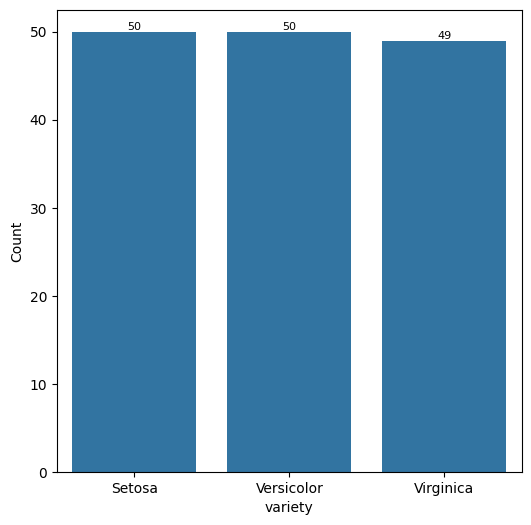

In [ ]:
# Checking the balance of the data by plotting the count of outcomes by their values

plt.figure(figsize=(6,6))
fh_status = sns.countplot(x='variety', data=data)

for number, count in enumerate(data['variety'].value_counts()):
    fh_status.text(number, count, str(count), ha='center', va='bottom', fontsize=8, color='black')

plt.xticks([0, 1, 2], ['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('variety')
plt.ylabel('Count')

Feature Scaling

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9')])

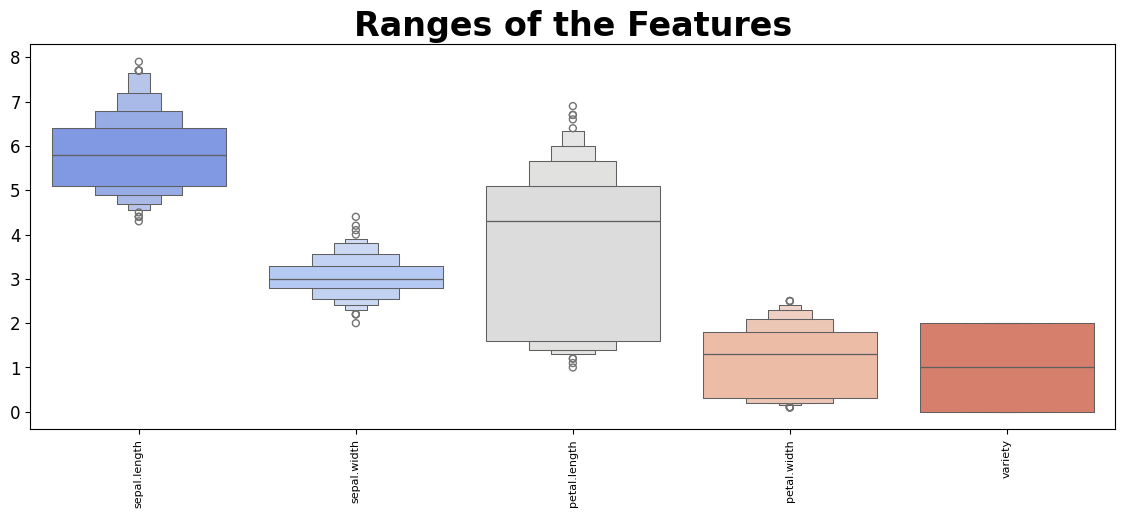

In [ ]:
# Ranges of the features
plt.figure(figsize=(14, 5))
sns.boxenplot(data=data, palette='coolwarm')

plt.title('Ranges of the Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

In [ ]:
# Splitting data into features (X) and outcomes (y)
X = data.drop(["variety"], axis=1)
y = data["variety"]

In [ ]:
# Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = StandardScaler()

X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)

In [ ]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,149.0,1.049124e-15,1.003373,-1.864149,-0.898033,-0.052682,0.671904,2.483370
sepal.width,149.0,1.669060e-16,1.003373,-2.436862,-0.597255,-0.137353,0.552499,3.081959
petal.length,149.0,-1.430623e-16,1.003373,-1.560289,-1.219738,0.312744,0.766812,1.788466
petal.width,149.0,-4.768743e-16,1.003373,-1.440192,-1.177055,0.138633,0.796477,1.717458


(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

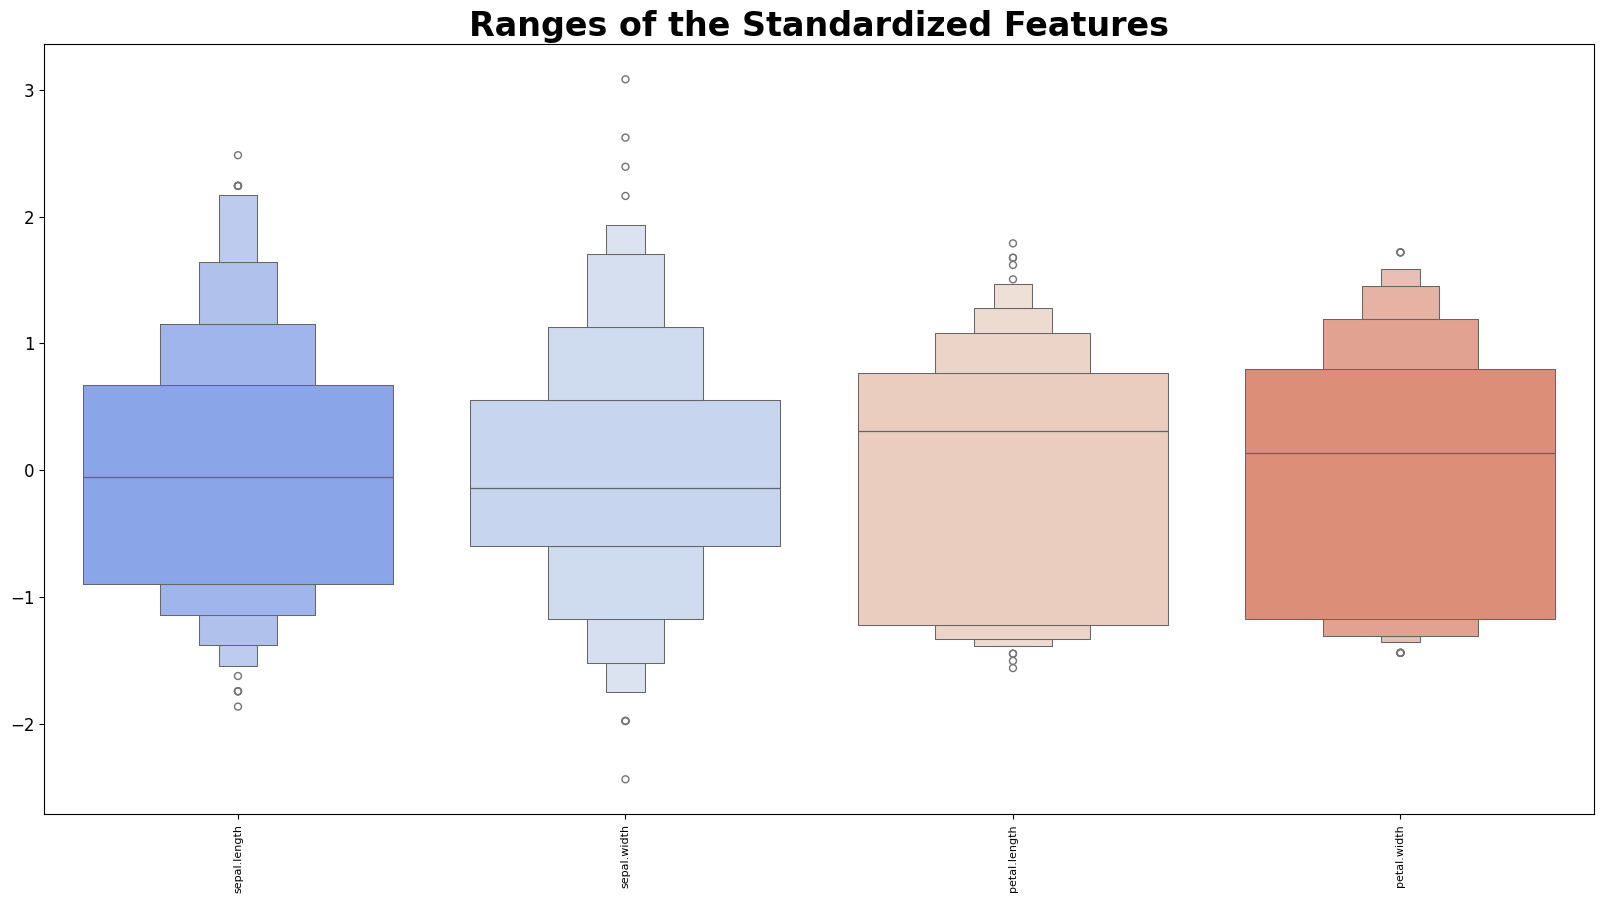

In [ ]:
# Plot the standardized features
plt.figure(figsize=(20, 10))
sns.boxenplot(data=X_df, palette='coolwarm')

plt.title('Ranges of the Standardized Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

Model Evaluation

In [ ]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 4), (30, 4), (119,), (30,))

KNN Algorithm

In [ ]:
test_scores=[]
train_scores=[]

for i in range(1,15):
  knn=KNeighborsClassifier(i)
  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v==max_train_score]
print("Max train score = ",max_train_score*100," and k = ",list(map(lambda x:x+1,train_scores_ind)))

Max train score =  100.0  and k =  [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v==max_test_score]
print("Max test score = ",max_test_score*100," and k = ",list(map(lambda x:x+1,test_scores_ind)))

Max test score =  100.0  and k =  [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


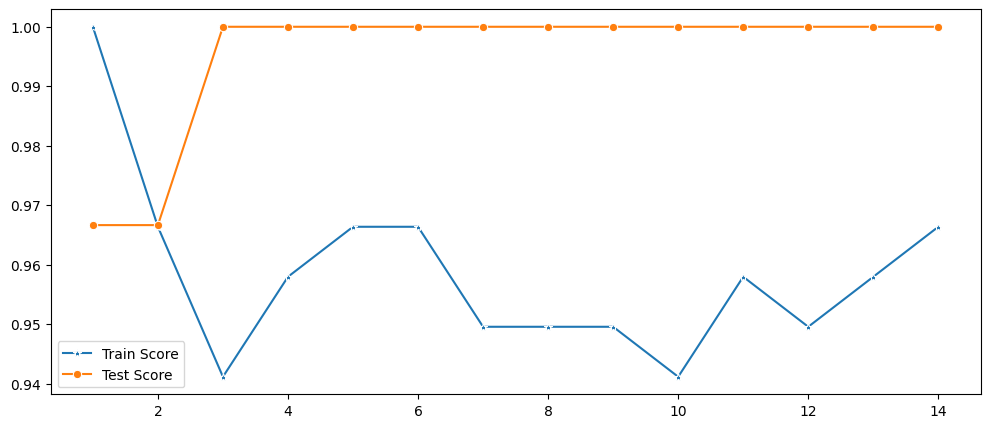

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores,marker='o',label='Test Score')
plt.show()

Best score is captured at k =  [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]. So, let us take k=3


In [ ]:
knn = KNeighborsClassifier(3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy Score of KNN : ",accuracy_score(y_test,y_pred)*100)

Accuracy Score of KNN :  100.0


Text(0.5, 3.722222222222216, 'Predicted Label')

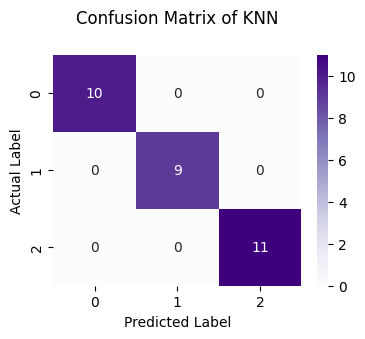

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of KNN",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

